<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***QuickSort***

## **Problema: Ordenamiento de una secuencia de números**
---

<img src="https://miro.medium.com/max/1150/1*Am1QeUnXRiRMii5Inb3vOQ.jpeg" alt="Sorting" width ='500'>

En general, un problema de ordenamiento para *n elementos numéricos* se puede describir de la siguiente forma:

>**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$
>
>**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

Buenas soluciones para problemas de ordenamiento son fundamentales para la optimización de otros procediminetos como por ejemplo la búsqueda binaria, algoritmo que depende de un arreglo ordenado de valores para poder implementarse.



## Descripción del algoritmo.


---


Nuevamente nos encontramos con un algoritmo del tipo *divide y vencerás*. 

QuickSort en un algoritmo con una cota asintótica superior mucho más similar al previamente-visto `InsertionSort`. Sin embargo aún es ampliamente utilizado dado que, según la elección del pivote para la partición del arreglo, su tiempo de ejecución será mucho más similar a aquella de MergeSort, incluso utilizando menos estructuras adicionales para el ordenamiento y con una baja cantidad de subprocesos ocultados por notación.

El algoritmo funciona de la siguiente manera:

1. Se ejecuta la función `Partition`, que se encarga de filtrar el arreglo en dos partes a partir de un pivote seleccionado. Al finalizar, nos encontramos con un arreglo $A[p...q...r]$ en el cual todos los elementos $A[p...q]$ son $ \le q$, mientras que ell resto son mayores a $q$.
2. Se llama recursivamente a quicksort dos veces, desde $A[p...q-1]$ a $A[q+1...r]$
3. ¡Se ha finalizado el ordenamiento!

En pseudo-código se vería así:


```
quick_sort( array A, lower_index p, higher_index r):
    if p<r:
        mid-index q = partition(A, p, r) # Partición del arreglo

        quick_sort(A, p, q-1) # Llamada reursiva en parte izquierda
        quick-sort(A, q+1, r) # Llamada recursiva en parte derecha
```

Por cada llamada recursiva en la cual ocurra la partición, el elemento de posición $q$ quedará en su posición correspondiente.

## Partition

---


Análogo a la función `Merge` en MergeSort, `Partition` es aquella que realmente se encarga del ordenamiento de los datos.

Esta función realiza una especie de filtración de los datos a partir de un elemento, al cuál llamaremos pivote.

<img src='https://miro.medium.com/max/672/0*UhtvKDTP7-srp75V' alt = 'Partition'>

Como se muestra en la imágen, al finalizar la ejecución de la función nos encontraremos con dos sub-arreglos separados por un elemento $q$.  Esta separación divide al arreglo en tres secciones, $A[p..q-1]$, $A[q+1...r]$ y $A[q]$, siendo $q$ el elemento medio entre ambos sub-conjuntos. La función retorna el índice del elemento $A[q]$.

Durante una iteración m-ésima del procedimiento, se puede visualizar el arreglo de la siguiente forma:

<img src="https://miro.medium.com/max/651/1*6385s-SLSf6MU0eysONtoQ.png" alt='Part'>

Donde los elementos desde $A[low..i]$ contiene aquellos elementos menores al pivote $x$, $A[i+1..j-1]$ contiene aquellos los elementos mayores al pivote $x$, $A[j..high-1]$ todos los elementos que aún no han sido clasificados y $x$, el pivote, contando un total de $4$ regiones dentro del arreglo.

El procedimiento es  el siguiente:
1. Se selecciona el pivote. Diremos que será igual a $A[r]$
2. Se inicializan las variables $i = p-1$ y $j = p$, las que ayudarán a delimitar los límites de los sub-arreglos a medida que se realiza cada m-iteración.

3. Se recorre el arreglo desde $j=p$ hasta $r-1$.

4. Se compara si $A[j]$ es mayor o menor que el pivote.

5. Si el elemento comparado es menor o igual al pivote, se intercambia $A[j]$ con $A[i+1]$ y se aumenta en unaunidad $i$. Esto asegura que todos los elementos menores al pivote se encuentren detrás de $j$.

6. Se avanza $j$ por cualquier iteración.

7. Una vez que $j = r-1$, se intercambia $A[r]$ con $A[i+1]$ y se retorna el nuevo índice del pivote.

Ejemplo:

<img src='https://www.codingeek.com/wp-content/uploads/2016/06/word-image-2.png' alt='example'>

###  Código de la función `partition`
El único detalle a mencionar en esta impolementación es que, a la hora de implementar las tres formas distintas de partición, se ha deccidido 'decirle' que hacer a la función a través de un parámetro.

El parámetro `par_type` puede recibir uno de tres argumentos:

> `last` selecciona como pivote al último elemento del arreglo que se desea partir.

>`first` se refiere a seleccionar el primer elemento del arreglo como pivote.

>`mid` se refiere a la mediana de tres elementos aleatorios del arreglo. En caso de que el arreglo no llegase a tener tres elementos, se retornará en último, imitando el comportamiento de `last`.

El método *'default'* es `last`

In [123]:
import random 

def median(A, p, r):
    if r-p+1 < 3: return r
    else:
        sample = random.sample(range(p,r+1),3)  #3 indices aleatorios

    if A[sample[1]] > A[sample[2]] and A[sample[0]] > A[sample[1]]: return sample[1]

    if A[sample[1]] > A[sample[0]] and A[sample[2]] > A[sample[1]]: return sample[1]

    if A[sample[0]] > A[sample[1]] and A[sample[2]] > A[sample[0]]: return sample[0]

    if A[sample[0]] > A[sample[2]] and A[sample[1]] > A[sample[0]]: return sample[0]

    return sample[2] # Retornar indice de la mediana

def exchange(A,i, j):
    aux = A[i]
    A[i] = A[j]
    A[j] = aux
    return

In [121]:
def partition(A, p, r, par_type = 'last'):
    if par_type == 'last':      # Partition usando como pivote el ultimo elemento
        pivot = A[r] ; position = r
        
    elif par_type == 'first' :  # Partition usando como pivote el primer elemento
        pivot = A[p] ; position = p
    
    elif par_type == 'mid':     # Pivote como la mediana de 3 elementos al azar
        position = median(A,p,r)
        pivot = A[position]

    else:
        print('partition type not valid')
        return None

    exchange(A,r,position)
    
    i = p-1
    j = p
    c = 0

    for j in range(j,r):
        c += 1    
        if A[j] <= pivot:
            i += 1
            exchange(A, i, j)

    exchange(A, i+1, r)
    return i+1, position, c

### Correctitud de `partition`
Para analizar la correcctitud del método `partition` se utilizará una *propiedad invariante de bucle*.

#### **Teorema**
El algoritmo partition recibe un arreglo $A$ junto a dos índices, $p$ y $r$, correspondientes al inicio y al fin del arreglo. Este método recibe el arreglo y retorna un índice $q$ de tal forma que $A[p...q-1]$ contiene solamente elementos menores o iguales a $q$ y $A[q+1...r]$ los mayores.

#### **Lema *(propiedad de bucle invariante)***
Al comienzo de cada iteración, se cumple que para cualquier índice k:

Si $p≤k≤i$, entonces $A[k]≤A[r]$

Si $i<k<j$, entonces $A[k]>A[r]$

#### **Inicialización**

Al inicio de la primera iteración, los sub-conjuntos contenidos por $[p..i]$ e $[i...j]$ se encuentran vacíos, por lo que la propiedad se cumple de forma trivial.

#### **Mantención**

Asumiendo que el, hasta la $(i-1)-ésima$ iteración se cumple la propiedad anteriormente mencionada, hay que ver que sucede en la $i-ésima$.

Sea $j$ el índice del elemento a comparar en la $i-ésima$ iteración, al comparar el elemento $A[j]$ se pueden realizar dos acciones:

1. $A[j] > A[r]$, no se realiza ningún cambio al arreglo, avanzando $j = j+1$.

> Esto provoca que se agrege un nuevo elemento mayor al pivote $A[r] $ al sub-conjunto contenido por $[i..j]$. Siendo $k$ el valor anterior de $j$, se comprueba que cumple con su parte ccorrespondiente de la propiedad pues $k$ está  ccontenido en $[i..j]$ y $A[k] > A[r]$

2. $A[j] \le A[r]$, se intercambia $A[j]$ con $A[i+1]$, $i = i+1$ y $j = j+1$. Esto agrega el elemento $A[j]$, ahora menor o igual al pivote, al sub-conjunto $[p...i]$, cumpliendo con el resto de la propiedad.


#### **Correctitud**

Como la propiedad se mantiene al inicio y en la $i-ésima$ iteración, se puede concluir que una vez llegue $j$ a $r-1$,  el arreglo se encontrará dividido por $q$ con elementos menor o iguales al pivote en $A[p..q-1]$ y mayores al pivote en $A[q+1..r]$, siendo $q$ el nuevo índice del pivote insertado.




## Ejemplo de QuickSort


---



Con tal de poder explicar mejor el algoritmo, se representará su funcionamiento paso a paso usando un arreglo pequeño como ejemplo.

Para este ejemplo, se asumirá que el método `partition` selecciona el último elemento del arreglo como el pivote.

<br>

---

Consideremos el arreglo $a = [4,9,0,1]$

$p = 0$, $r=3$ 

Se llama al método `Partition`, quien tomará a $r ,  A[r] = 1$ como pivote.

Primera llamada a `partition`:

`Primera comparación. i = -1, j = 0`


> $4$ vs $pivote$
no se realizan cambios.

`Segunda comparación. i = -1, j = 1 `

> $9$ vs $pivote$
no se realizan cambios.

`Segunda comparación. i = -1, j = 2 `

> $0$ vs $pivote$, se realiza el cambio entre $A[i+1]$ y $A[j]$

$a = [4,9,0,1]$

$a = [0,9,4,1]$

`Fin de la primera llamada. i = 0, j = 2`

Se intercambia $A[r]$ con $A[i+1]$ y se retorna $q = i+1$, el elemento medio entre ambos sub-arreglos.

$a = [0,1,4,9]$

Segunda llamada a `Partiton`

El sub-conjunto $[0]$ ya se encuentra ordenado

Tercera llamada a `Partition`

`Primera comparación. i = 1, j = 2, pivote = 9`

> $4$ vs $pivote$ no se realiza cambio.

`Fin de la llamada ya que j = r-1`

Y listo, el arreglo $a = [0,1,4,9]$ se encuentra ordenado.


## Código

El parámetro par_type puede tomar tres valores; `mid`, `last` o `first`. Determina de qué forma se seleccionará el pivote.

El método predeterminado es `last`

In [112]:
from termcolor import colored

def quick_sort(A, p, r, par_type='last', verbose = False, i = 1):

    if p<r:
        
        if verbose == True:
            prev = A.copy()
            print(f"Paso {i}, vista general del arreglo : ")
            print(f"    {A}\n")

            print(f"-> arreglo a filtrar")
            print(f"    {A[p:r+1]}\n")

            print(f"-> indices p y r:")
            print(f"    {p}, {r}\n")

        q, pos, c_par = partition(A,p,r,par_type = par_type)
        if q == None: return

        if verbose == True:
            print(f"-> q obtenido por particion {par_type}:")
            print(f"    {pos} (Relativo a todo el arreglo)\n")
            
            aux = prev[pos]
            print("Arreglo antes de la particion:")
            if pos==p:
                print("    ",str(prev[p:pos])[1:-1], colored(f"{str(aux)},", "blue", attrs=["bold"]), str(prev[pos+1:r+1])[1:-1], "\n")
            else:
                print("    ",str(prev[p:pos])[1:-1], ",",colored(f"{str(aux)}", "blue", attrs=["bold"]), str(prev[pos+1:r+1])[1:-1], "\n")

            aux = A[q]
            print(f"Arreglo luego de la particion:")
            if p==q:
                print("    ",str(A[p:q])[1:-1], colored(f"{str(aux)},", "blue", attrs=["bold"]), str(A[q+1:r+1])[1:-1], "\n")

            else:
                print("    ",str(A[p:q])[1:-1], ",",colored(f"{str(aux)}", "blue", attrs=["bold"]), str(A[q+1:r+1])[1:-1], "\n")

            print(f"-> comparaciones realizadas en esta particion: {c_par}")

            print("\n------------------------------------------\n")

        c_izq = quick_sort(A, p, q-1, par_type = par_type, i = i+1, verbose = verbose)
        c_der = quick_sort(A, q+1, r, par_type = par_type, i = i+1, verbose = verbose)

        if i == 1 and verbose == True:
            print(f"Arreglo ordenado ! :) !!")
            print(f"Total de comparaciones : {c_par + c_izq + c_der}")
            print(f"Arreglo ordenado:")
            print(f"====> {A}")

        return c_par + c_izq + c_der

    return 0

In [113]:
import random
a = random.sample(range(-20,20), 10)
a

[-7, 10, 14, -9, 3, 18, -6, 5, -10, -18]

In [114]:
# Test mid
b = a.copy()
c = quick_sort(b,0,len(b)-1, par_type = 'mid')
a, c

([-7, 10, 14, -9, 3, 18, -6, 5, -10, -18], 21)

In [115]:
# Test last
b = a.copy()
c = quick_sort(b,0,len(a)-1, par_type = 'last')
a, c

([-7, 10, 14, -9, 3, 18, -6, 5, -10, -18], 27)

In [116]:
# Test first
b = a.copy()
c = quick_sort(b,0,len(a)-1, par_type = 'first')
a, c

([-7, 10, 14, -9, 3, 18, -6, 5, -10, -18], 21)

### Ejecución paso a paso `verbose = True`
Se realizarán tres ejecuciones de la función, una por cada forma de partición

In [117]:
import random
b = random.sample(range(1, 100), 6)
a = b.copy()
c= quick_sort(a,0,len(a)-1, par_type = 'last', verbose=True)

Paso 1, vista general del arreglo : 
    [8, 48, 50, 71, 38, 66]

-> arreglo a filtrar
    [8, 48, 50, 71, 38, 66]

-> indices p y r:
    0, 5

-> q obtenido por particion last:
    5 (Relativo a todo el arreglo)

Arreglo antes de la particion:
     8, 48, 50, 71, 38 , 66  

Arreglo luego de la particion:
     8, 48, 50, 38 , 66 71 

-> comparaciones realizadas en esta particion: 5

------------------------------------------

Paso 2, vista general del arreglo : 
    [8, 48, 50, 38, 66, 71]

-> arreglo a filtrar
    [8, 48, 50, 38]

-> indices p y r:
    0, 3

-> q obtenido por particion last:
    3 (Relativo a todo el arreglo)

Arreglo antes de la particion:
     8, 48, 50 , 38  

Arreglo luego de la particion:
     8 , 38 50, 48 

-> comparaciones realizadas en esta particion: 3

------------------------------------------

Paso 3, vista general del arreglo : 
    [8, 38, 50, 48, 66, 71]

-> arreglo a filtrar
    [50, 48]

-> indices p y r:
    2, 3

-> q obtenido por particion last:
 

In [118]:
a = b.copy()
c= quick_sort(a,0,len(a)-1, par_type = 'first', verbose=True)

Paso 1, vista general del arreglo : 
    [8, 48, 50, 71, 38, 66]

-> arreglo a filtrar
    [8, 48, 50, 71, 38, 66]

-> indices p y r:
    0, 5

-> q obtenido por particion first:
    0 (Relativo a todo el arreglo)

Arreglo antes de la particion:
      8, 48, 50, 71, 38, 66 

Arreglo luego de la particion:
      8, 48, 50, 71, 38, 66 

-> comparaciones realizadas en esta particion: 5

------------------------------------------

Paso 2, vista general del arreglo : 
    [8, 48, 50, 71, 38, 66]

-> arreglo a filtrar
    [48, 50, 71, 38, 66]

-> indices p y r:
    1, 5

-> q obtenido por particion first:
    1 (Relativo a todo el arreglo)

Arreglo antes de la particion:
      48, 50, 71, 38, 66 

Arreglo luego de la particion:
     38 , 48 71, 66, 50 

-> comparaciones realizadas en esta particion: 4

------------------------------------------

Paso 3, vista general del arreglo : 
    [8, 38, 48, 71, 66, 50]

-> arreglo a filtrar
    [71, 66, 50]

-> indices p y r:
    3, 5

-> q obtenido p

In [119]:
a = b.copy()
c= quick_sort(a,0,len(a)-1, par_type = 'mid', verbose=True)

Paso 1, vista general del arreglo : 
    [8, 48, 50, 71, 38, 66]

-> arreglo a filtrar
    [8, 48, 50, 71, 38, 66]

-> indices p y r:
    0, 5

-> q obtenido por particion mid:
    2 (Relativo a todo el arreglo)

Arreglo antes de la particion:
     8, 48 , 50 71, 38, 66 

Arreglo luego de la particion:
     8, 48, 38 , 50 66, 71 

-> comparaciones realizadas en esta particion: 5

------------------------------------------

Paso 2, vista general del arreglo : 
    [8, 48, 38, 50, 66, 71]

-> arreglo a filtrar
    [8, 48, 38]

-> indices p y r:
    0, 2

-> q obtenido por particion mid:
    2 (Relativo a todo el arreglo)

Arreglo antes de la particion:
     8, 48 , 38  

Arreglo luego de la particion:
     8 , 38 48 

-> comparaciones realizadas en esta particion: 2

------------------------------------------

Paso 2, vista general del arreglo : 
    [8, 38, 48, 50, 66, 71]

-> arreglo a filtrar
    [66, 71]

-> indices p y r:
    4, 5

-> q obtenido por particion mid:
    5 (Relativo a 

## Análisis del algoritmo

### **Correctitud para QuickSort**


---



#### ***Hipótesis:***
*QuickSort* recibe un arreglo  A  de  n  elementos, retornando el arreglo ordenado de forma que  $a_1≤a_2≤...a_n$

#### ***Caso base***
Para el caso base  $n=1$ , se cumple la declaración pues al ser un elemento único se encuentra trivialmente ordenado.

#### ***Paso inductivo***
Para $n$ elementos, la función `Partition` divide el arreglo en dos sub-arreblos de tamaño $n/2$ o próximo, encontrándonos lejos del peor caso. Por cada arreglo separado por `partition`, tenemos que $A[floor...q-1]$ posee los elementos menores a $A[q]$ y $A[q+1...top]$ mayores a $A[q]$, siendo $A[q]$ el elemento medio entre ambos, ordenado.

Luego, se llama recursivamente a *Quicksort* para cada sub-arreglo generado. 

Asumiendo que el método `Partition` es correcto, una vez el cada sub-arreglo se encuentre dividio hasta contener un elemento, los elementos estarán ordenados. 

Por lo tanto, **QuickSort es correcto.**

### **Tiempo de ejecución**


---



El algoritmo *QuickSort* divide un arreglo en 2 sub-arreglos de tamaño variable recursivamente. Además, por cada llamada a la función se le agrega el tiempo que cuesta dividir el problema y el coste de la función *Partition*.

Partition tiene un tiempo de ejecución lineal pues recorre una sola vez el arreglo para comparar sus elementos con el pivote, correspondiendo a un tiempo de ejecución de $O(n)$

La división del arreglo es constante,  $O(1)$.

El tiempo de ejecución dependerá del caso en el cual nos encontremos y la selección del pivote.

Finalizamos con la siguiente ecuación para el peor caso *(pivote es siempre el mayor o menor elemento de cada sub-arreglo)*:

$T(n) =\begin{cases}
  O(1)  & n = 1 \\
  T(0) + T(n-1) + O(n) & \text{ otherwise}
\end{cases}$

Y para el mejor caso *(pivote divide el arreglo a la mitad)*

$T(n) = \begin{cases}
  O(1)  & n = 1 \\
  2 T(n/2) + O(n) & \text{ otherwise}
\end{cases}$

representado como árbol binario tenemos: 

`peor caso`
<img src='https://cdn.kastatic.org/ka-perseus-images/7da2ac32779bef669a6f05decb62f219a9132158.png'>


`mejor caso`
<img src='https://cdn.kastatic.org/ka-perseus-images/21cd0d70813845d67fbb11496458214f90ad7cb8.png'>



fuente imágenes: https://www.khanacademy.org/computing/computer-science/algorithms/quick-sort/a/analysis-of-quicksort

Se puede visualizar claramente un tiempo de ejecución de $O(n ⋅ log (n))$ para el mejor caso (por altura y costo por nivel en árbol) y $O(n^2)$ para el peor caso (sumatoria de 1 a n, viendo el pseudo-árbol desde abajo haccia arriba)

## Experimentación

A continuación se realizarán una serie de experminetos respecto al algoritmo.


### **Impacto de la selección del pivote.**

Ya se ha discutido anteriormente que el peor caso lo encontraremos cuando el arreglo se encuentre ordenado puesto a que la selección del pivote determina en cuantos elementos se partirá el arreglo original. Sin embargo, incluso si no se ccumple siempre, es conveniente definir un método que prevenga seleccionar algún extremo para cualquier iteración pues disminuirá considerablemente la cantidad de comparaciones, especialmente si nos encontramos con altos volúmenes de datos.

A continuación, se muestra el impacto de la selección del  en las comparaciones y tiempo de ejecución para el ordenamiento de arreglos ordenados y arreglos aleatorios.



#### Arreglos aleatorios, comparaciones y tiempo de ejecución.


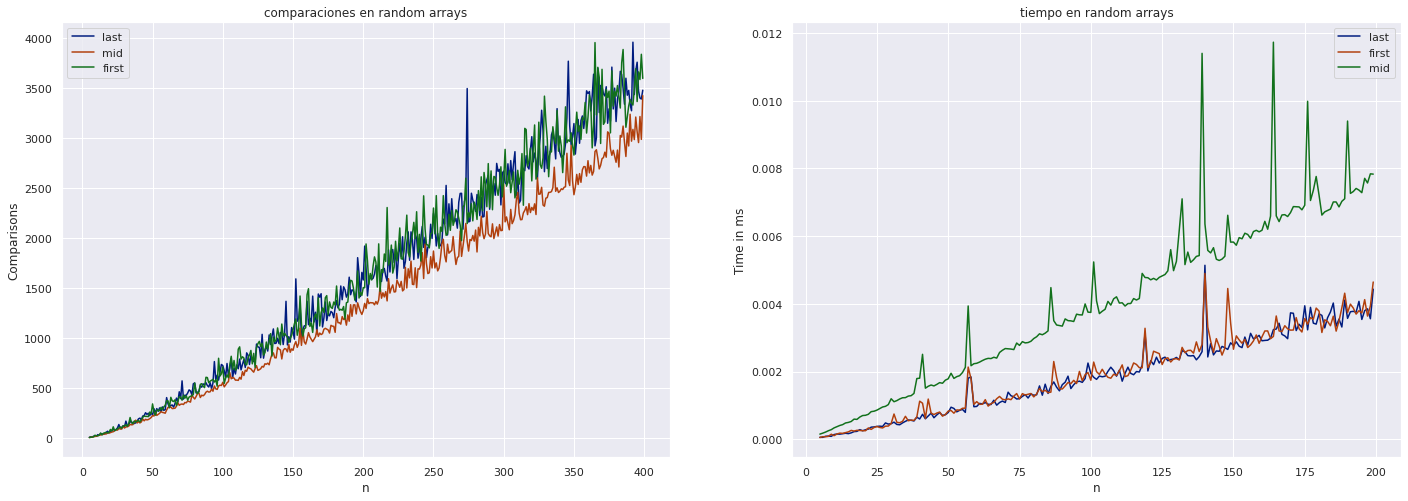

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
import random

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')

fig, ax = plt.subplots(1,2,figsize=(24,8)) 

# Comparaciones
x=[n for n in range(5,400)] 
y2=[] 
y=[]
y1=[]

for n in range(5,400):
  b = random.sample(range(1, 400), n)

  a = b.copy()
  counter = quick_sort(a,0,len(a)-1)
  y.append(counter)

  a = b.copy()
  counter = quick_sort(a,0,len(a)-1, par_type='mid')
  y1.append(counter)

  a = b.copy()
  counter = quick_sort(a,0,len(a)-1, par_type='first')
  y2.append(counter) 
  
ax[0].plot(x,y)
ax[0].plot(x,y1)
ax[0].plot(x,y2)
ax[0].set_ylabel("Comparisons")
ax[0].set_xlabel("n")
ax[0].legend(["last", "mid", "first"])
ax[0].set_title("comparaciones en random arrays")

# Tiempo

x=[]; x2=[]; x3=[]
y=[]; y2=[]; y3=[]

for n in range(5,200):

  b = random.sample(range(1, 1000), n)

  a = b.copy()
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='last')", repeat=1, number=10)
  x.append(n)
  y.append(t)

  a = b.copy()
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='first')", repeat=1, number=10)
  x2.append(n)
  y2.append(t)

  a = b.copy()
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='mid')", repeat=1, number=10)
  x3.append(n)
  y3.append(t)


  
ax[1].plot(x,y)
ax[1].plot(x,y2)
ax[1].plot(x,y3)
ax[1].set_ylabel("Time in ms")
ax[1].set_xlabel("n")
ax[1].legend(["last", "first", "mid"])
ax[1].set_title("tiempo en random arrays")
  

plt.show()

Se destaca la menor cantidad de comparaciones para el método `mid`

#### Arreglos ordenados, comparaciones y tiempo de ejecución.

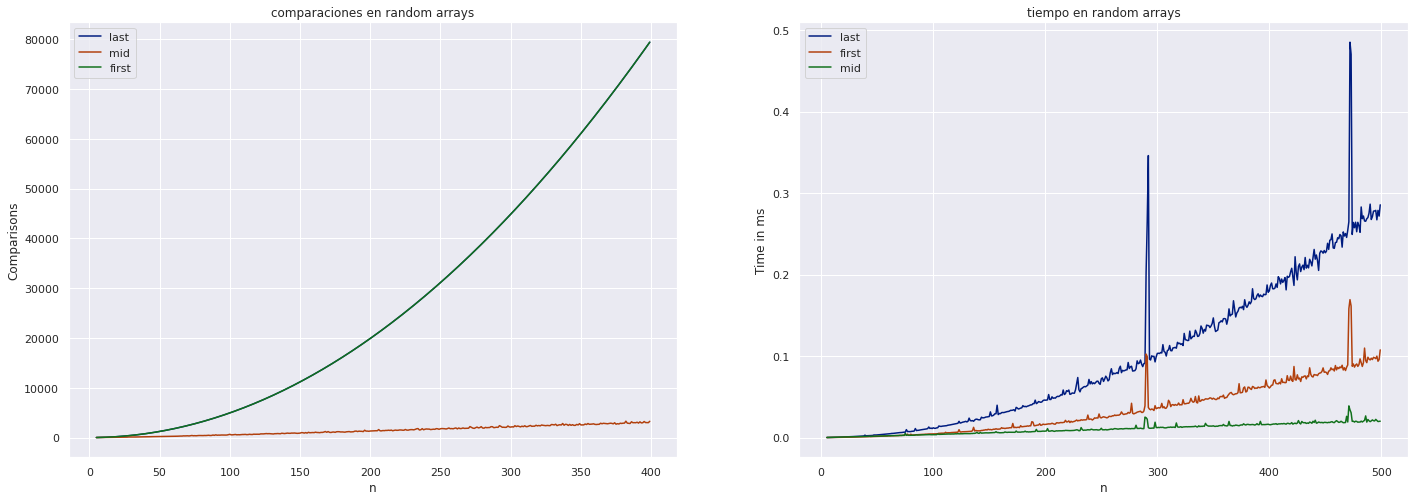

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
import random

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')

fig, ax = plt.subplots(1,2,figsize=(24,8)) 

# Comparaciones
x=[n for n in range(5,400)] 
y2=[] 
y=[]
y1=[]

for n in range(5,400):
  b = [*range(0, n)]

  a = b.copy()
  counter = quick_sort(a,0,len(a)-1)
  y.append(counter)

  a = b.copy()
  counter = quick_sort(a,0,len(a)-1, par_type='mid')
  y1.append(counter)

  a = b.copy()
  counter = quick_sort(a,0,len(a)-1, par_type='first')
  y2.append(counter) 
  
ax[0].plot(x,y)
ax[0].plot(x,y1)
ax[0].plot(x,y2)
ax[0].set_ylabel("Comparisons")
ax[0].set_xlabel("n")
ax[0].legend(["last", "mid", "first"])
ax[0].set_title("comparaciones en random arrays")

# Tiempo

x=[]; x2=[]; x3=[]
y=[]; y2=[]; y3=[]

for n in range(5,500):

  b = [*range(0, n)]

  a = b.copy()
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='last')", repeat=1, number=10)
  x.append(n)
  y.append(t)

  a = b.copy()
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='first')", repeat=1, number=10)
  x2.append(n)
  y2.append(t)

  a = b.copy()
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='mid')", repeat=1, number=10)
  x3.append(n)
  y3.append(t)


  
ax[1].plot(x,y)
ax[1].plot(x,y2)
ax[1].plot(x,y3)
ax[1].set_ylabel("Time in ms")
ax[1].set_xlabel("n")
ax[1].legend(["last", "first", "mid"])
ax[1].set_title("tiempo en random arrays")
  

plt.show()

La búsqueda de un pivote adecuado posee un costo igual considerable cuando se compara con los otros dos métodos, al menos para arreglos aleatorios pues para arreglos ordenados el tiempo de ejecución aumenta de forma cuadrática.

Un comportamiento similar ocurre en las comparaciones.

### **Número de comparaciones**
A continuación, una comparación entre en número de comparaciones real, y los casos teóricos.


Además, se comparará con el rendimiento del algoritmo `MergeSort`

In [126]:
import random
from termcolor import colored
import copy

def Merge(A,p,q,r):
  arr_B = []
  c = 0                # Número de comparaciones

  cpy_q = q            # Almacenar valor inicial de 
  cpy_p = p            # q y p para futuras operaciones
  q+= 1                

  while p != cpy_q+1 and q != r+1:
    c += 1
    if A[p] <= A[q] : arr_B.append(A[p]) ; p+= 1   # Caso en el cual valor derecho es menor (o igual)
    elif A[q] < A[p] : arr_B.append(A[q]) ; q+= 1  # Caso izquierdo

  if p == cpy_q+1:                                 # Agregar elementos sobrantes
    arr_B += A[q:r+1]
  elif  q == r+1:
    arr_B += A[p:cpy_q+1]

  A[cpy_p:r+1] = arr_B                             # Copiar contenidos en dentro de rango
  return arr_B , c

def MergeSort(A, p, r, c = 0, i = 1, steps = 0, verbose = False):
   queue = []                    # Lista guarda información por iteración
   queue.append((A[p:r+1], i, steps)) 
   

   if p==r: return c, queue      # Verifica que el arreglo tenga un solo elemento 
 
   q = int((p+r)/2)              # La mitad del arreglo
   c_izq, q_izq = MergeSort(A,p,q,i=i+1, steps = queue[-1][2]+1 ,verbose = verbose)   # Ordenamiento de rama izquierda
   
   if verbose == True:
     for j in q_izq:
      queue.append(j)          

   c_der, q_der = MergeSort(A,q+1,r,i=i+1,steps = queue[-1][2]+1 ,verbose = verbose)   # Ordenamiento rama derecha
   if verbose == True:
     for j in q_der:
        queue.append(j)

   b,c = Merge(A,p,q,r)             # Ordenamiento de ambas ramas
   if verbose == True:
     queue.append((b,f"merge",queue[-1][2]+1))
   
   c += c_izq+c_der

   if i == 1 and verbose == True:
     mrgs = 1
     prev = -1
     for i in queue:
       if i[2] == 0 : 
         print(f"Arreglo inicial: {i[0]}\n") 
         prev = i[1]
         continue

       print(f"Paso {i[2]}")
       if i[1] == "merge": 
         print(f"Se ha realizado el Merge nº{mrgs}!")
         print(f"Arreglos ordenados y unidos:")
         
         mrgs+=1
       else:
         print("Se ha dividido el arreglo!")
       print(i[0], "\n")
       
       print("-------------------------------------")

     print()
     print(f"Total comparaciones: {c}")
     print("Arreglo ordenado!")
   
   return c, queue

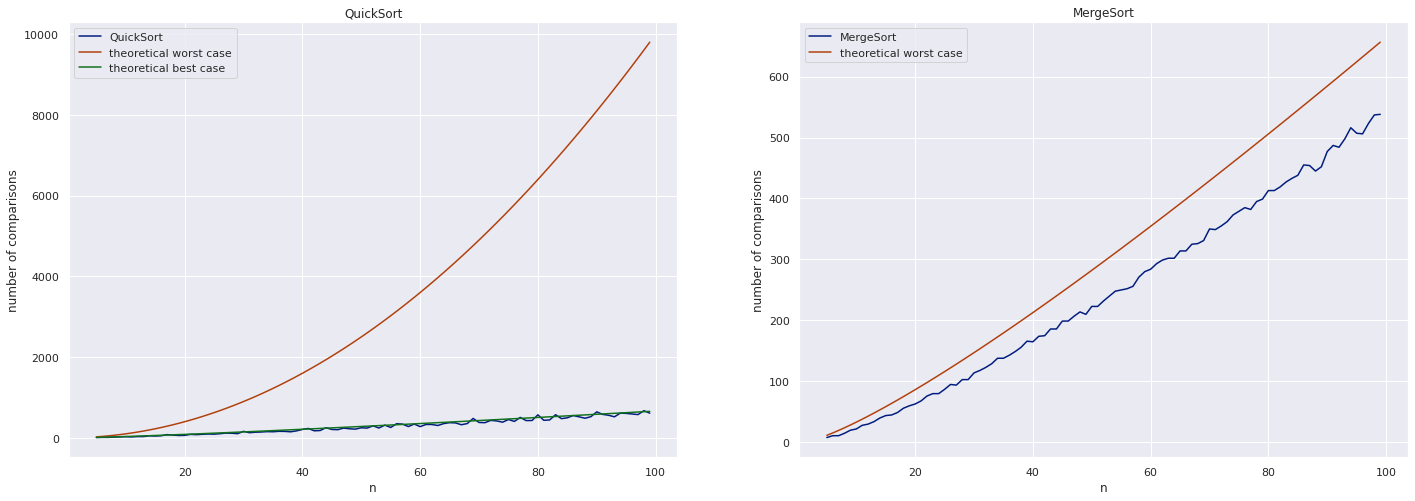

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
import random

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')

fig, ax = plt.subplots(1,2,figsize=(24,8)) # Creacion figura

# QUICK SORT
x=[n for n in range(5,100)] 
y1=[n*n for n in range(5,100)] # worst case
y2=[n*log2(n) for n in range(5,100)] # best case
y=[]; 

for n in range(5,100):
  a = random.sample(range(1, 400), n)
  counter = quick_sort(a,0,len(a)-1, par_type='last')
  y.append(counter)


ax[0].plot(x,y)
ax[0].plot(x,y1)
ax[0].plot(x,y2)
ax[0].legend(["QuickSort", "theoretical worst case", "theoretical best case"])

ax[0].set_xlabel('n')
ax[0].set_ylabel('number of comparisons')
ax[0].set_title("QuickSort")

# MERGE SORT
x=[n for n in range(5,100)] 
y12=[n*log2(n) for n in range(5,100)] # worst case
y2=[]; 

for n in range(5,100):
  a = random.sample(range(1, 400), n)
  counter, q = MergeSort(a,0,len(a)-1)
  y2.append(counter)


ax[1].plot(x,y2)
ax[1].plot(x,y12)
ax[1].legend(["MergeSort", "theoretical worst case"])

ax[1].set_xlabel('n')
ax[1].set_ylabel('number of comparisons')
ax[1].set_title("MergeSort")



plt.show()

La comparación de ambos gráficos por separado puede ser engañoso, pero en realidad ambos algoritmos realizan cantidades de comparaciones bastante similiares.

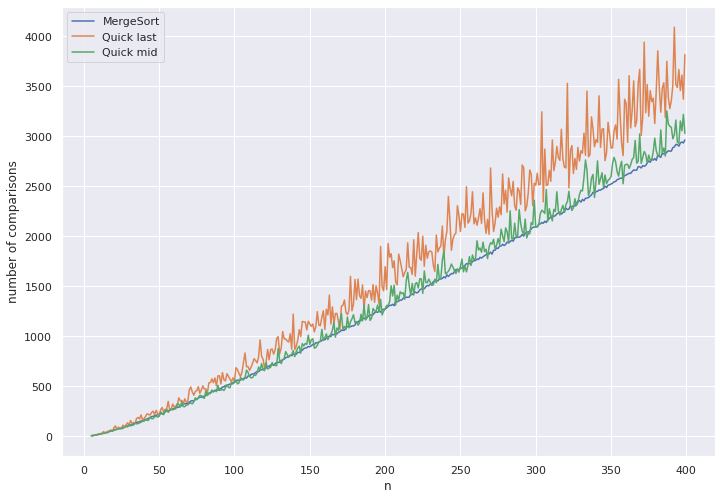

In [133]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x=[n for n in range(5,400)] 
y2=[] 
y=[]
y1=[]

for n in range(5,400):
  a = random.sample(range(1, 400), n)
  counter, qu = MergeSort(a,0,len(a)-1)
  y.append(counter)

for n in range(5,400):
  a = random.sample(range(1, 400), n)
  counter = quick_sort(a,0,len(a)-1)
  y1.append(counter)

for n in range(5,400):
  a = random.sample(range(1, 400), n)
  counter = quick_sort(a,0,len(a)-1, par_type='mid')
  y2.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Quick last", "Quick mid"])

plt.xlabel('n')
plt.ylabel('number of comparisons')
plt.show()

Como se mencionó, la catidad de comparaciones es bastante similar. Sin embargo, MergeSort es mucho más constante que QuickSort (Dado que la función Merge realiza siempre las mismas comparaciones) y, además, hay una gran diferencia en cómo se selecciona el pivote.

Esta diferencia puede estar sujeta a la relativa aleatoriedad del algoritmo pues la partición del arreglo depende mucho del pivote seleccionado.

Nunca se descartan fallos en la actual implementación.

### **Tiempo de ejecución**
1. Tiempo de ejecución en arreglos desordenados.

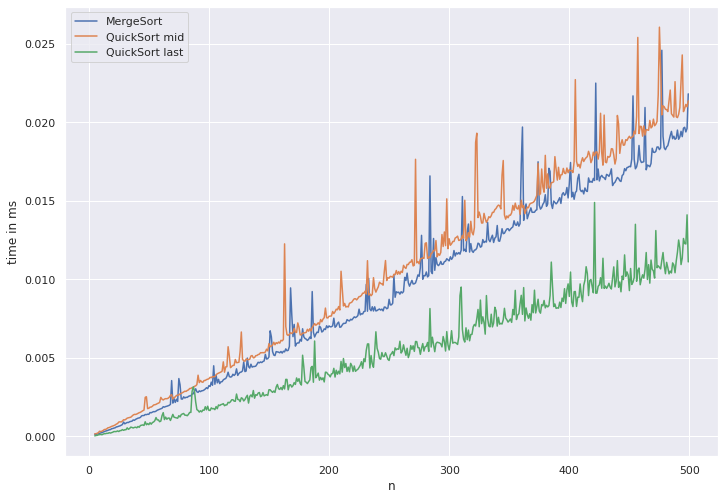

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')

sns.set(rc={'figure.figsize':(11.7,8.27)})

x=[]; x2=[]; x3=[]
y=[]; y2=[]; y3=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='mid')", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='last')", repeat=1, number=10)

  x3.append(n)
  y3.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.legend(["MergeSort", "QuickSort mid", 'QuickSort last'])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

2. Tiempo de ejecución en arreglos ordenados

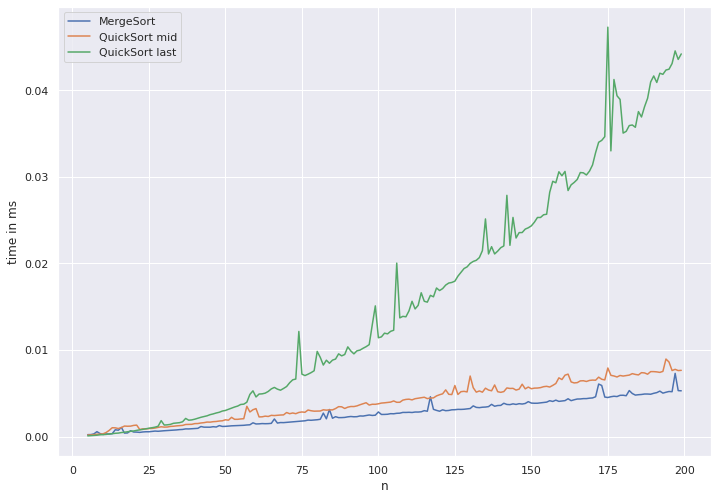

In [125]:
x=[]; x2=[]; x3=[]
y=[]; y2=[]; y3=[]

for n in range(5,200):

  a = [*range(0, n)]
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,200):

  a = [*range(0, n)]
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='mid')", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

for n in range(5,200):

  a = [*range(0, n)]
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1},par_type='last')", repeat=1, number=10)

  x3.append(n)
  y3.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.legend(["MergeSort", "QuickSort mid", 'QuickSort last'])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Ha resultado sorpresivo que el uso de la mediana de tres elementos aleatorios resulte más costoso en tiempo que el elegir de pivote el último elemento del arreglo.  Esto pudo haberse provocado por una mala implementación de la función que calcula la mediana (o, francamente, cualquier otro preceso implementado).

Se ve claramente como aumenta el tiempo de ejecución al intentar ordenar arreglos ya ordenados con el método de partición `last`, sirviendo `mid` como "escudo portector" al costo de un lijero mayor tiempo de ejecución, incluso contra el algoritmo `MergeSort`.

Sin embargo, QuickSort con la elección del último elemento como pivote (tiempo de ejecución constante) es bastante más eficiente que MergeSort.

Habría que buscar mejores implementaciones para la búsqueda de la mediana u otros métodos para la selección del pivote para poder superar por completo al algoritmo MergeSort.

Independiente de lo desalentadores quepueden parecer estos gráficos, hay que recordar que QuickSort utiliza menos recursos de memoria que MergeSort. Por último, se puede decir que MergeSort convendrá para conjuntos de elementos ordenadoso semi-ordenados.

#### **Experimentos experimentales**

In [188]:
!pip install line_profiler &> /dev/null
%load_ext line_profiler

! pip install memory_profiler &> /dev/null
%load_ext memory_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [190]:
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

In [191]:
## la siguiente linea guarda el código del bloque en el archivo quicksort.py
%%write_and_run quicksort.py
import random 
def median(A, p, r):
    if r-p+1 < 3: return r
    else:
        sample = random.sample(range(p,r+1),3)  #3 indices aleatorios

    if A[sample[1]] > A[sample[2]] and A[sample[0]] > A[sample[1]]: return sample[1]

    if A[sample[1]] > A[sample[0]] and A[sample[2]] > A[sample[1]]: return sample[1]

    if A[sample[0]] > A[sample[1]] and A[sample[2]] > A[sample[0]]: return sample[0]

    if A[sample[0]] > A[sample[2]] and A[sample[1]] > A[sample[0]]: return sample[0]

    return sample[2] # Retornar indice de la mediana

def exchange(A,i, j):
    aux = A[i]
    A[i] = A[j]
    A[j] = aux
    return
def partition(A, p, r, par_type = 'last'):
    if par_type == 'last':      # Partition usando como pivote el ultimo elemento
        pivot = A[r] ; position = r
        
    elif par_type == 'first' :  # Partition usando como pivote el primer elemento
        pivot = A[p] ; position = p
    
    elif par_type == 'mid':     # Pivote como la mediana de 3 elementos al azar
        position = median(A,p,r)
        pivot = A[position]

    else:
        print('partition type not valid')
        return None

    exchange(A,r,position)
    
    i = p-1
    j = p
    c = 0

    for j in range(j,r):
        c += 1    
        if A[j] <= pivot:
            i += 1
            exchange(A, i, j)

    exchange(A, i+1, r)
    return i+1, position, c

from termcolor import colored

def quick_sort(A, p, r, par_type='last', verbose = False, i = 1):

    if p<r:
        
        if verbose == True:
            prev = A.copy()
            print(f"Paso {i}, vista general del arreglo : ")
            print(f"    {A}\n")

            print(f"-> arreglo a filtrar")
            print(f"    {A[p:r+1]}\n")

            print(f"-> indices p y r:")
            print(f"    {p}, {r}\n")

        q, pos, c_par = partition(A,p,r,par_type = par_type)
        if q == None: return

        if verbose == True:
            print(f"-> q obtenido por particion {par_type}:")
            print(f"    {pos} (Relativo a todo el arreglo)\n")
            
            aux = prev[pos]
            print("Arreglo antes de la particion:")
            if pos==p:
                print("    ",str(prev[p:pos])[1:-1], colored(f"{str(aux)},", "blue", attrs=["bold"]), str(prev[pos+1:r+1])[1:-1], "\n")
            else:
                print("    ",str(prev[p:pos])[1:-1], ",",colored(f"{str(aux)}", "blue", attrs=["bold"]), str(prev[pos+1:r+1])[1:-1], "\n")

            aux = A[q]
            print(f"Arreglo luego de la particion:")
            if p==q:
                print("    ",str(A[p:q])[1:-1], colored(f"{str(aux)},", "blue", attrs=["bold"]), str(A[q+1:r+1])[1:-1], "\n")

            else:
                print("    ",str(A[p:q])[1:-1], ",",colored(f"{str(aux)}", "blue", attrs=["bold"]), str(A[q+1:r+1])[1:-1], "\n")

            print(f"-> comparaciones realizadas en esta particion: {c_par}")

            print("\n------------------------------------------\n")

        c_izq = quick_sort(A, p, q-1, par_type = par_type, i = i+1, verbose = verbose)
        c_der = quick_sort(A, q+1, r, par_type = par_type, i = i+1, verbose = verbose)

        if i == 1 and verbose == True:
            print(f"Arreglo ordenado ! :) !!")
            print(f"Total de comparaciones : {c_par + c_izq + c_der}")
            print(f"Arreglo ordenado:")
            print(f"====> {A}")

        return c_par + c_izq + c_der

    return 0

In [192]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [205]:
b = random.sample(range(1, 1000), 500)
from quicksort import quick_sort,\
                      partition,\
                      median,\
                      exchange
                    
%lprun -f quick_sort -f partition -f median -f exchange quick_sort(a,0,len(a)-1, par_type='mid')

In [206]:
b = random.sample(range(1, 1000), 500)
from quicksort import quick_sort,\
                      partition,\
                      median,\
                      exchange
                    
%lprun -f quick_sort -f partition -f median -f exchange quick_sort(a,0,len(a)-1, par_type='last')

Resultado  mid:
<img src='https://i.imgur.com/Vo9inGI.png'>

Resultado last:
<img src='https://i.imgur.com/1UTGXu0.png'>

Se evidencia el ligero incremento en tiempo de ejecución por la función `median`. Considerando múltiples  llamadas recursivas, se explica el considerable incremento en tiempo de ejecución.

En al análisis completo, se puede observar que las operaciones más costosas dentro de partition son las llamadas a median y exchange.

In [207]:
b = random.sample(range(1, 1000), 500)
from quicksort import quick_sort,\
                      partition,\
                      median,\
                      exchange
a = b.copy()
%mprun -f quick_sort -f partition -f median -f exchange quick_sort(a,0,len(a)-1, par_type='last')

In [209]:
a = b.copy()
%memit quick_sort(a,0,len(a)-1, par_type='mid')

peak memory: 296.05 MiB, increment: 0.00 MiB


El intentar realizar evaluaciones del uso de memoria aún se debe perfeccionar, por lo que no se pueden realizar observaciones a momento. Se sospecha que se está realizando algún procedimiento mal, pues el análisis no presenta ningún incremento en alguna parte de la implementación, ni siquiera para MergeSort.
